<a href="https://colab.research.google.com/github/Laluprasad1/Data-Mining-2025/blob/main/DM_LAB_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab-07: Outlier Detection**

* **Identify outliers using statistical methods or boxplots** <br>
* **Handle outliers by capping, removal, or imputation**

**2303A51948**

In [1]:
# 1. imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Creating a synthetic dataset

# np.random.rand()
# np.random.randn()

np.random.seed(42)
data = np.random.normal(0, 1, 100) # Normal Distribution
outliers = np.random.uniform(5, 10, 5) # Artificial outlier

In [3]:
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [4]:
outliers

array([7.08705502, 6.11053905, 5.59932684, 6.68807586, 9.71454852])

In [5]:
data.shape

(100,)

In [6]:
outliers.shape

(5,)

In [7]:
pd.DataFrame(data).describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [8]:
pd.DataFrame(outliers).describe()

,0
count,5.000000
mean,7.039909
std,1.598336
min,5.599327
25%,6.110539
50%,6.688076
75%,7.087055
max,9.714549


In [9]:
data_with_outliers = np.concatenate([data, outliers])

# Converting into DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

df

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,7.087055
101,6.110539
102,5.599327
103,6.688076


In [10]:
# S-1: Detect Outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -2.3232332563637335
Upper Bound: 2.372622015963629


In [11]:
# Identifying outliers based on IQR
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("Outliers based on IQR:\n", outliers_iqr)

Outliers based on IQR:
         Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


In [12]:
# S-2: Detect outliers using Z-score method
z_scores = stats.zscore(df['Value'])
print("Z-Score:\n", z_scores)

outliers_zscore = df[np.abs(z_scores) > 3]
print("\n\nOutliers based on Z-Score:\n", outliers_zscore)

Z-Score:
 0      0.145800
1     -0.209754
2      0.230337
3      0.720481
4     -0.263446
         ...   
100    3.836033
101    3.289237
102    3.002986
103    3.612626
104    5.307286
Name: Value, Length: 105, dtype: float64


Outliers based on Z-Score:
         Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


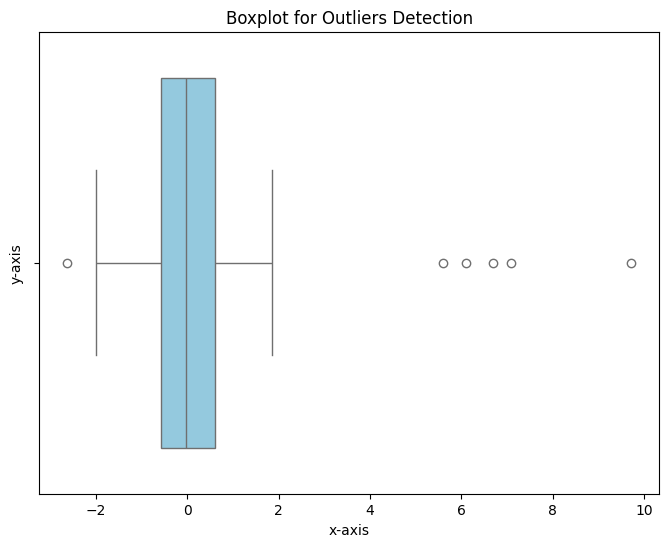

In [13]:
# S-3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'], color="skyblue")
plt.title("Boxplot for Outliers Detection")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
# plt.savefig() - used to save the figure

In [14]:
# S-4: Handle Outliers

# S-4(1): Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)
df_capped

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,2.372622
101,2.372622
102,2.372622
103,2.372622


In [15]:
# S-4(2): Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) & (df_removed['Value'] <= upper_bound)]
df_removed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


In [16]:
# S-4(3): Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['Value'].median()
print("Median:", median_value)
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) | (df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])
print("\ndf imputed:\n", df_imputed)

Median: -0.03582603910995154

df imputed:
         Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


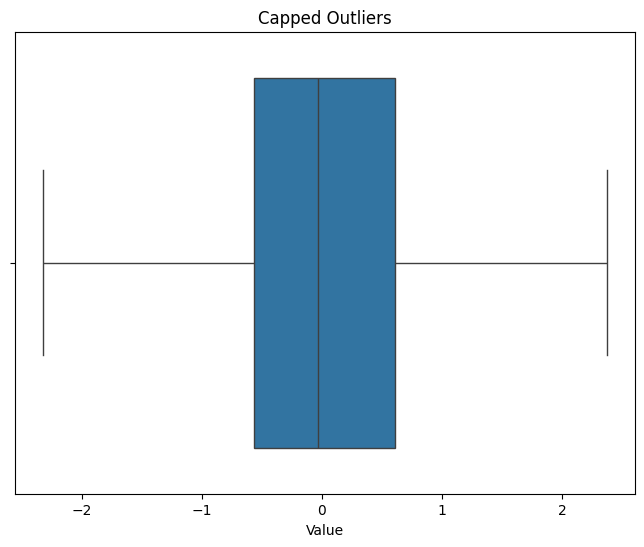

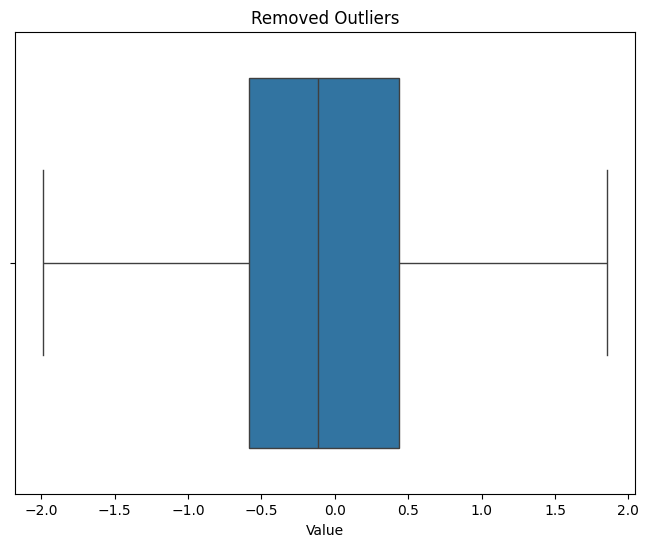

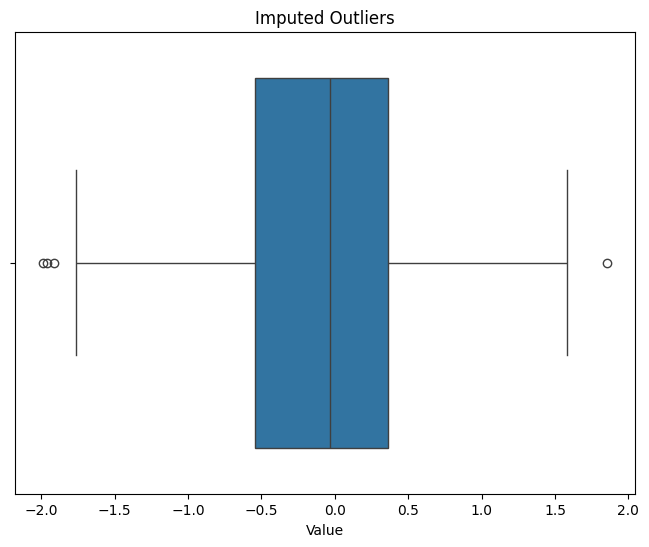

In [17]:
# S-5: Visualize handeled data

# Capped data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()


In [18]:
# Printing outliers detected
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"\nOutliers detected using z-score:\n{outliers_zscore}")

Outliers detected using IQR:
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

Outliers detected using z-score:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
